# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
import pandas as pd

# قراءة ملف البيانات
df = pd.read_csv("tic-tac-toe.csv")

# عرض أول 5 صفوف للتأكد من شكل البيانات
print(df.head())


  TL TM TR ML MM MR BL BM BR  class
0  x  x  x  x  o  o  x  o  o   True
1  x  x  x  x  o  o  o  x  o   True
2  x  x  x  x  o  o  o  o  x   True
3  x  x  x  x  o  o  o  b  b   True
4  x  x  x  x  o  o  b  o  b   True


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 🔹 قراءة البيانات
df = pd.read_csv("tic-tac-toe.csv")

# 🔹 تحويل القيم الفئوية إلى أرقام
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

# 🔹 فصل المدخلات (X) عن المخرجات (y)
X = df.iloc[:, :-1]  # جميع الأعمدة ما عدا الأخير
y = df.iloc[:, -1].values   # العمود الأخير هو المخرجات

# 🔹 تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ التحقق من نجاح التقسيم
print(f"عدد عينات التدريب: {X_train.shape[0]}")
print(f"عدد عينات الاختبار: {X_test.shape[0]}")



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


عدد عينات التدريب: 766
عدد عينات الاختبار: 192


In [7]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.70.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using 

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 🔹 إنشاء النموذج
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # طبقة مخفية 1
    Dense(16, activation='relu'),  # طبقة مخفية 2
    Dense(2, activation='softmax')  # الطبقة النهائية مع softmax لأن لدينا تصنيفين
])

# عرض ملخص النموذج
model.summary()


c:\Users\hano1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 466 (1.82 KB)

 Trainable params: 466 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# تجميع النموذج قبل التدريب
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# تدريب النموذج
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6079 - loss: 0.6549 - val_accuracy: 0.6250 - val_loss: 0.6346
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6413 - loss: 0.6329 - val_accuracy: 0.6458 - val_loss: 0.6233
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6408 - loss: 0.6366 - val_accuracy: 0.6615 - val_loss: 0.6159
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6363 - loss: 0.6258 - val_accuracy: 0.6510 - val_loss: 0.6109
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6652 - loss: 0.6140 - val_accuracy: 0.6615 - val_loss: 0.6039
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6998 - loss: 0.5949 - val_accuracy: 0.6615 - val_loss: 0.5974
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6791 - loss: 0.5880 - val_accuracy: 0.6719 - val_loss: 0.5920
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6942 - loss: 0.5946 - val_accuracy: 0.6771 - val_loss

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [11]:
# إجراء التنبؤات على بيانات الاختبار
y_pred = model.predict(X_test)

# إذا كنت تستخدم تصنيف ثنائي أو متعدد الفئات، استخدم np.argmax لاختيار أعلى قيمة
import numpy as np
y_pred_classes = np.argmax(y_pred, axis=1)

# عرض أول 10 قيم متوقعة وقيمها الحقيقية للمقارنة
print("التوقعات:", y_pred_classes[:10])
print("القيم الحقيقية:", y_test[:10])


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
التوقعات: [1 1 1 1 1 1 0 0 0 1]
القيم الحقيقية: [0 1 1 0 0 1 1 1 1 0]


In [12]:
# تقييم النموذج على بيانات الاختبار
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"دقة النموذج على بيانات الاختبار: {test_acc:.4f}")
print(f"الخسارة على بيانات الاختبار: {test_loss:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7012 - loss: 0.5569 
دقة النموذج على بيانات الاختبار: 0.7292
الخسارة على بيانات الاختبار: 0.5399


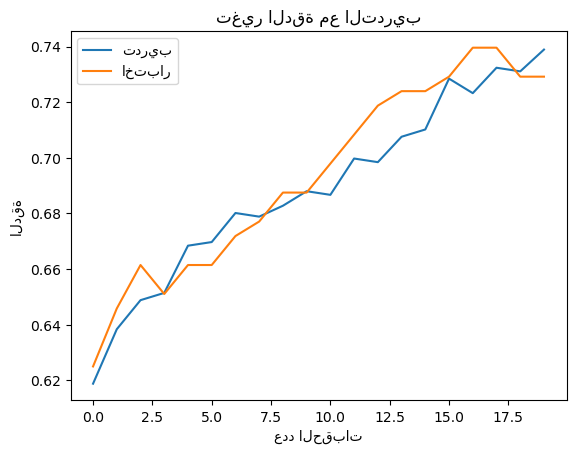

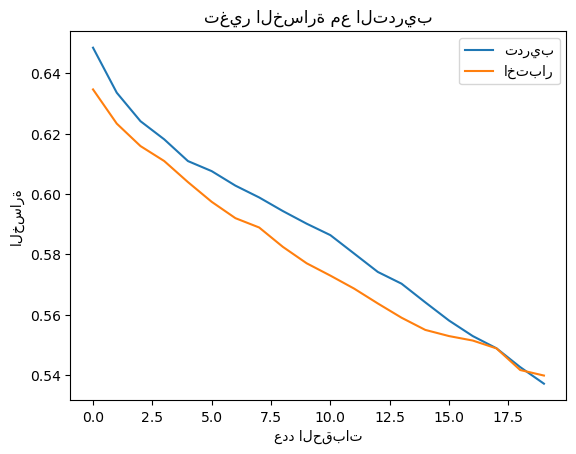

In [13]:
import matplotlib.pyplot as plt

# رسم منحنى الدقة
plt.plot(history.history['accuracy'], label='تدريب')
plt.plot(history.history['val_accuracy'], label='اختبار')
plt.xlabel('عدد الحقبات')
plt.ylabel('الدقة')
plt.legend()
plt.title('تغير الدقة مع التدريب')
plt.show()

# رسم منحنى الخسارة
plt.plot(history.history['loss'], label='تدريب')
plt.plot(history.history['val_loss'], label='اختبار')
plt.xlabel('عدد الحقبات')
plt.ylabel('الخسارة')
plt.legend()
plt.title('تغير الخسارة مع التدريب')
plt.show()


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [14]:
from tensorflow.keras.optimizers import Adam

# ضبط معدل التعلم إلى 0.001 أو أي قيمة أخرى
optimizer = Adam(learning_rate=0.001)

# إعادة تجميع النموذج
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7149 - loss: 0.5707 - val_accuracy: 0.7396 - val_loss: 0.5407
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7322 - loss: 0.5326 - val_accuracy: 0.7448 - val_loss: 0.5385
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7543 - loss: 0.5101 - val_accuracy: 0.7448 - val_loss: 0.5374
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7346 - loss: 0.5224 - val_accuracy: 0.7292 - val_loss: 0.5355
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7527 - loss: 0.5027 - val_accuracy: 0.7344 - val_loss: 0.5357
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7541 - loss: 0.5004 - val_accuracy: 0.7344 - val_loss: 0.5343
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7529 - loss: 0.5115 - val_accuracy: 0.7240 - val_loss: 0.5322
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7631 - loss: 0.4862 - val_accuracy: 0.7292 - val_loss

**Which approach(es) did you find helpful to improve your model performance?**

In [ ]:
# Adjusting the learning rate to 0.001 helped improve model performance.
# Increasing the number of epochs to 50 allowed the model to learn better.
# Using the Adam optimizer helped achieve better convergence.
